# Part II - Ford Go Bike Dataset Exploration
## by (ODINIGWE CHINYERE ROSEMARY)


## Investigation Overview


>  For this presentation,i will focus on the distribution of the key features of interest such as 
- The user demographics with respect to age,usertype and gender.
- The distribution of trips across days of the week and hours of the day.
- Usertype and gender relationship with duration and age
- The duration of user type and genders across the days of the week
- The top 3 stations and its relationship to usertype and gender


## Dataset Overview

> This dataset was provided by Udacity and it includes information regarding 183,000 rides made in Ford Go bike-sharing system covering the greater San Francisco Bay area. The data features include trip duration (secs),trip start and end time,start and end stations,customer type, gender, birth year and some additional variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_2019=pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
bike_19=bike_2019.copy()
bike_19.dropna(inplace = True)

bike_19['start_time'] = pd.to_datetime(bike_19['start_time'])
bike_19['end_time'] = pd.to_datetime(bike_19['end_time'])

bike_19[['start_station_id','end_station_id','bike_id']] = bike_19[['start_station_id','end_station_id','bike_id']].astype('str')


bike_19[['user_type','member_gender','bike_share_for_all_trip']] = bike_19[['user_type','member_gender','bike_share_for_all_trip']] .astype('category')

bike_19['member_birth_year'] = bike_19['member_birth_year'].astype('int')


bike_19['duration_min'] = bike_19['duration_sec']/60
bike_19['dayoftheweek'] = bike_19['start_time'].dt.strftime('%a')

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_cat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
bike_19['dayoftheweek'] = bike_19['dayoftheweek'].astype(weekday_cat)

bike_19['hr_day'] = bike_19['start_time'].dt.hour
bike_19['member_age'] = 2019 - bike_19['member_birth_year']

bike_19= bike_19.drop(columns = ['start_time','end_time','start_station_id','end_station_id','start_station_latitude','end_station_latitude','start_station_longitude','end_station_longitude','bike_id','member_birth_year','duration_sec'])

bike_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 9 columns):
start_station_name         174952 non-null object
end_station_name           174952 non-null object
user_type                  174952 non-null category
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null category
duration_min               174952 non-null float64
dayoftheweek               174952 non-null category
hr_day                     174952 non-null int64
member_age                 174952 non-null int64
dtypes: category(4), float64(1), int64(2), object(2)
memory usage: 8.7+ MB


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Age Distribution of users

> The ages from this dataset contained some outliers such as Max age(141), after setting the upper bound to 65 as the initial data was rightly skewe,The majority of the users were observed to be between the age of 25-35 as shown below.


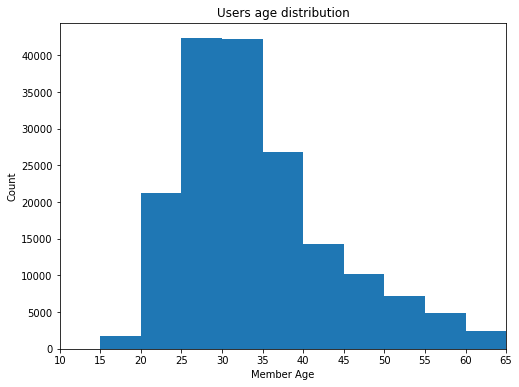

In [4]:
plt.figure(figsize=[8,6])

bins = np.arange(10, bike_19['member_age'].max()+5, 5)
plt.hist(data=bike_19, x='member_age', bins=bins)
plt.title('Users age distribution')
plt.xticks(bins, bins)
plt.xlabel('Member Age')
plt.xlim([10,65])
plt.ylabel('Count');

## User Type and Gender distribution

> Ford Go bike users for Feb 2019 is composed of more **Subcribers and Male** genders as shown in plots below.

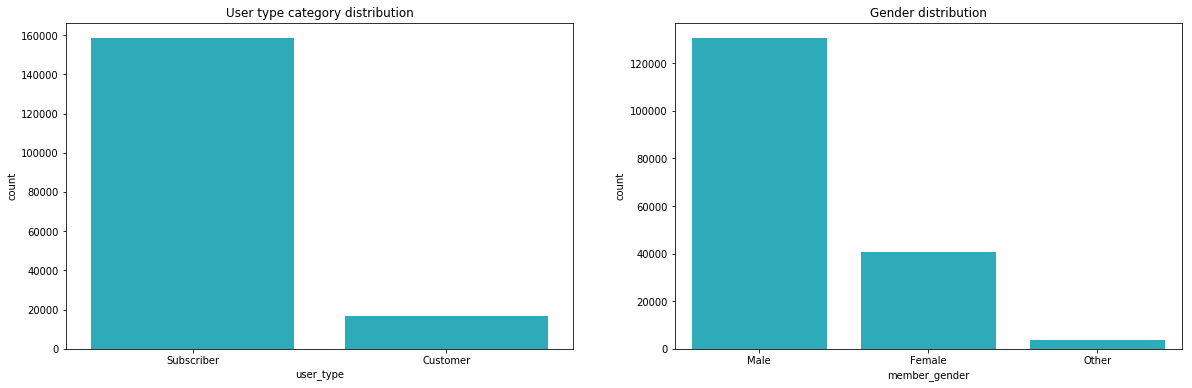

In [5]:
fig, ax = plt.subplots(ncols=2, figsize = [20,6])

plotcolor = sb.color_palette()[9]

sb.countplot(data = bike_19,x = 'user_type',color = plotcolor,order=bike_19.user_type.value_counts().index,ax = ax[0])
ax[0].set_title('User type category distribution');

sb.countplot(data = bike_19,x = 'member_gender',color = plotcolor, order=bike_19.member_gender.value_counts().index,ax = ax[1])
ax[1].set_title('Gender distribution');

## Usage frequency across weekdays and hours.

> The usage frequency peaks during the week is on Thursday and Tuesday.The peak hours are between (8-9)hrs for the morning hours of the day and (17-18)hrs for the evening hrs of the day.This can be attributed to the work timeline in san francisco.



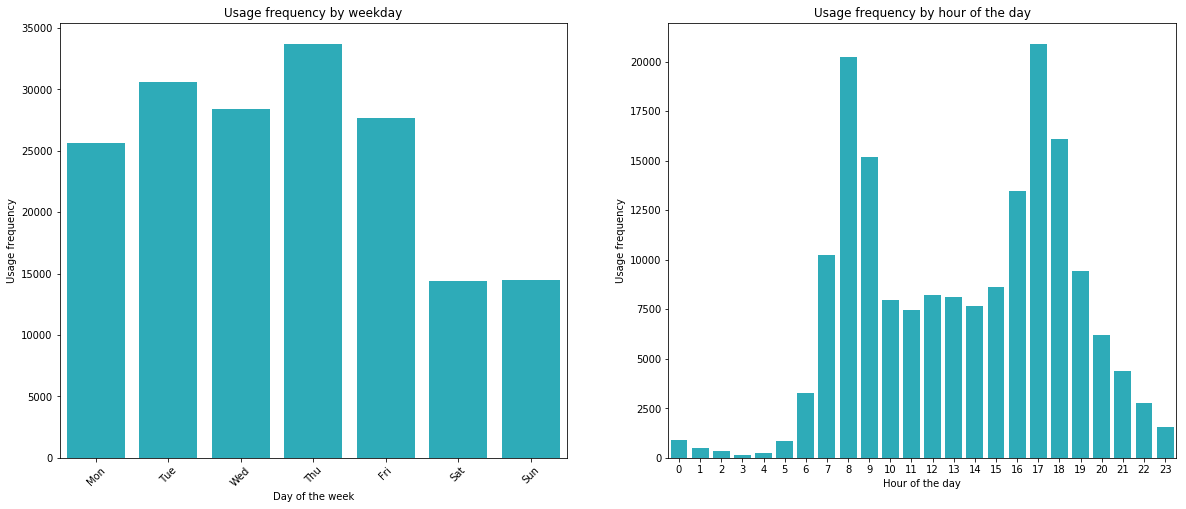

In [6]:
plt.figure(figsize=[20,8])
plotcolor = sb.color_palette()[9]

plt.subplot(1,2,1)

sb.countplot(data = bike_19, x = 'dayoftheweek', color = plotcolor)
plt.xticks(rotation = 45)
plt.title('Usage frequency by weekday')
plt.xlabel('Day of the week')
plt.ylabel('Usage frequency');

plt.subplot(1,2,2)

sb.countplot(data = bike_19, x = 'hr_day', color = plotcolor)
plt.title('Usage frequency by hour of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Usage frequency');

## Usertype and Gender relationship with age and duration.

> The users who are Customer have longer bike trip on average as compared to users who are Subscribers and Female users have longer bike trip on average as compared to Male users while The average age of the Customer and Subscriber users is approximately same and the average age of the Male users is higher than the average age of the Female users

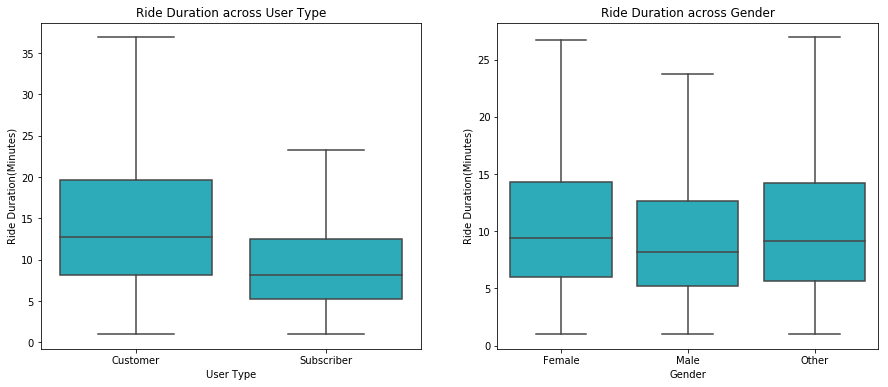

In [7]:
outliers= ((bike_19.member_age>65) | (bike_19.duration_min>100))
bike_19=bike_19[-outliers]

plt.figure(figsize = [15, 6])
plotcolor = sb.color_palette()[9]
plt.subplot(1,2,1)
sb.boxplot(data = bike_19, y= 'duration_min', x= 'user_type',color=plotcolor,showfliers=False)
plt.title('Ride Duration across User Type')
plt.xlabel('User Type')
plt.ylabel('Ride Duration(Minutes)');

plt.subplot(1,2,2)

sb.boxplot(data = bike_19, y= 'duration_min', x='member_gender',color=plotcolor,showfliers=False)
plt.title('Ride Duration across Gender')
plt.xlabel('Gender')
plt.ylabel('Ride Duration(Minutes)');

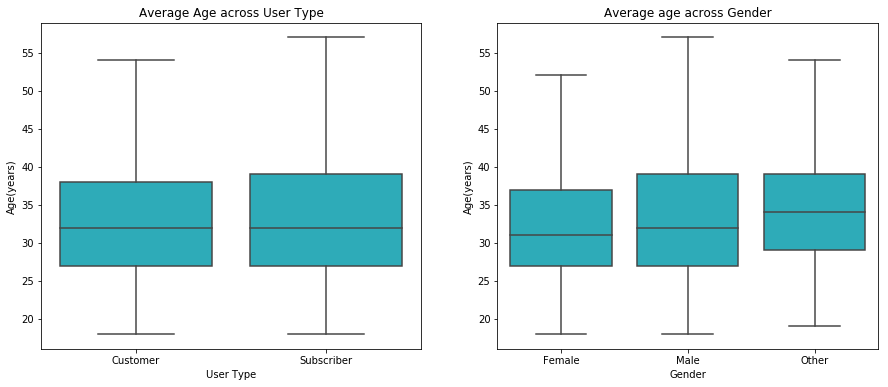

In [8]:
plt.figure(figsize = [15, 6])
plotcolor = sb.color_palette()[9]
plt.subplot(1,2,1)
sb.boxplot(data = bike_19, y= 'member_age', x= 'user_type',color=plotcolor,showfliers=False)
plt.title('Average Age across User Type')
plt.xlabel('User Type')
plt.ylabel('Age(years)');

plt.subplot(1,2,2)

sb.boxplot(data = bike_19, y= 'member_age', x= 'member_gender',color=plotcolor,showfliers=False)
plt.title('Average age across Gender')
plt.xlabel('Gender')
plt.ylabel('Age(years)');

## Trip durations of Usertype and Gender across the days of the week.

> Customers have higher average trip duration for all days of the week, although they spend longer times on weekends than on weekdays.Female users have higher average trip duration for all days of the week and also spend longer times on weekends than on weekdays

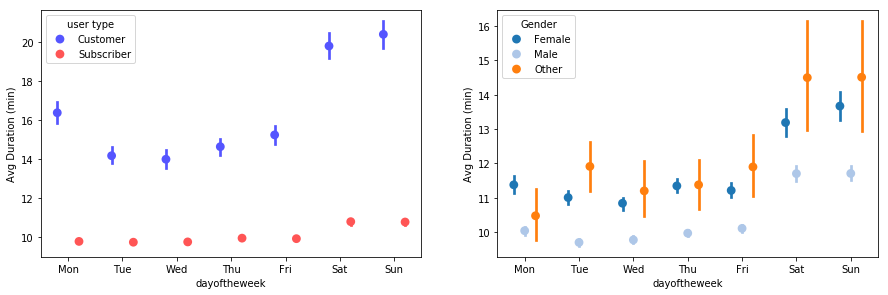

In [9]:
plt.figure(figsize = [15, 10])

plt.subplot(2, 2, 1)
ax1=sb.pointplot(data=bike_19, x='dayoftheweek', y='duration_min', hue='user_type', palette='seismic', linestyles = '', dodge = 0.4)
ax1.set_ylabel('Avg Duration (min)')
ax1.legend(loc=2, title='user type')

plt.subplot(2, 2, 2)
ax1=sb.pointplot(data=bike_19, x='dayoftheweek', y='duration_min', hue='member_gender', palette='tab20', linestyles = '', dodge = 0.4)
ax1.set_ylabel('Avg Duration (min)')
ax1.legend(loc=2, title='Gender');

## The top 3 stations and its relationship to usertype and gender.

> The male subscribers are majority in numbers in all the 3 stations compared to the female subscribers.The female subscriber for Market st at 10th st is higher than that of other stationss

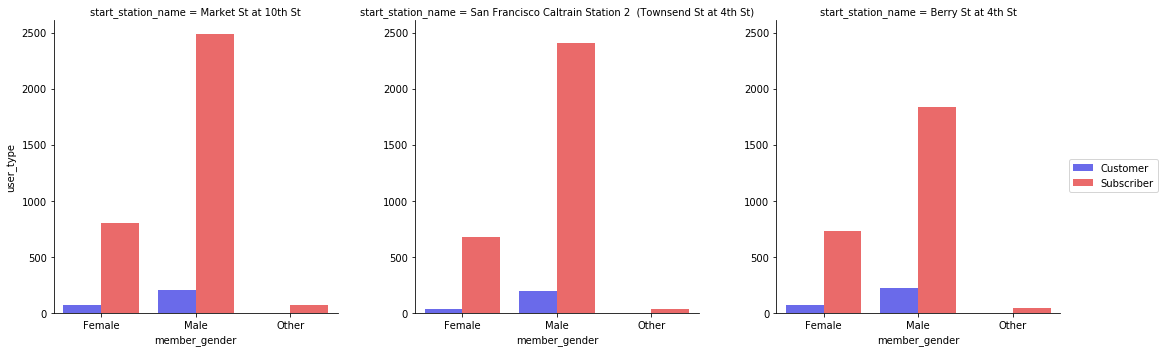

In [10]:
Top3station=bike_19.start_station_name.value_counts().index[:3]
bike_19sub=bike_19.loc[bike_19['start_station_name'].isin (Top3station)]

def countplot(x,hue, **kwargs):
    sb.countplot(x=x,hue=hue, **kwargs)
g=sb.FacetGrid(data=bike_19sub,col='start_station_name',size=5,aspect=1)
g.map(countplot,'member_gender','user_type',palette='seismic',order=bike_19sub.member_gender.unique())
g.add_legend();

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_Ford_Go_Bike_slide_deck.ipynb --to slides --post serve --no-input --no-prompt 

[NbConvertApp] Converting notebook Part_II_Ford_Go_Bike_slide_deck.ipynb to slides
[NbConvertApp] Writing 440855 bytes to Part_II_Ford_Go_Bike_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_Ford_Go_Bike_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 77